In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data.metrics import get_metrics

In [ ]:
df = pd.read_json("../reports/discretization_grid.jsonl", lines=True)
df = df[df['grow_factor'] < 5]

In [53]:
get_metrics(df)

In [67]:
hparams = ["model_cls", "loc_levels", "grow_factor", "discretization_rows", 'discretization_shape']
metrics = [
    "macro_precision",
    "macro_recall",
    "macro_f1",
    "top_5_accuracy",
    "top_1_accuracy",
]

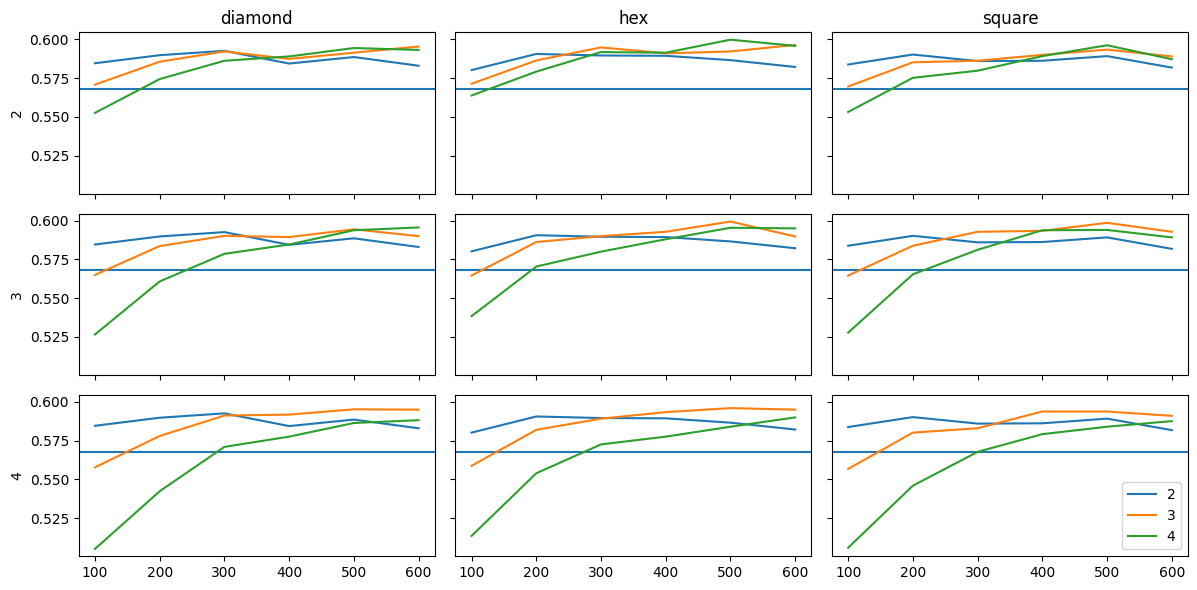

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 6), sharex=True, sharey=True)
df_model = df[df["model_cls"] == "BiTULER"]
df_base = df_model[df_model['loc_levels'] == 1]
df_plot = df_model[df_model["aggregation_mode"] == "grow"]
for col_idx, (shape, df_col) in enumerate(df_plot.groupby("discretization_shape")):
    axs[0, col_idx].set_title(shape)
    for row_idx, (grow_factor, df_row) in enumerate(df_col.groupby("grow_factor")):
        ax = axs[row_idx, col_idx]
        ax.axhline(y=df_base['top_1_accuracy'].item())
        for loc_levels in [2, 3, 4]:
            df_line = df_row[df_row['loc_levels'] == loc_levels]
            df_line = df_line.sort_values(by="discretization_rows")
            ax.plot(
                df_line["discretization_rows"],
                df_line["top_1_accuracy"],
                label=loc_levels,
            )
        if col_idx == 0:
            ax.set_ylabel(grow_factor)
leg = ax.legend()
fig.tight_layout()

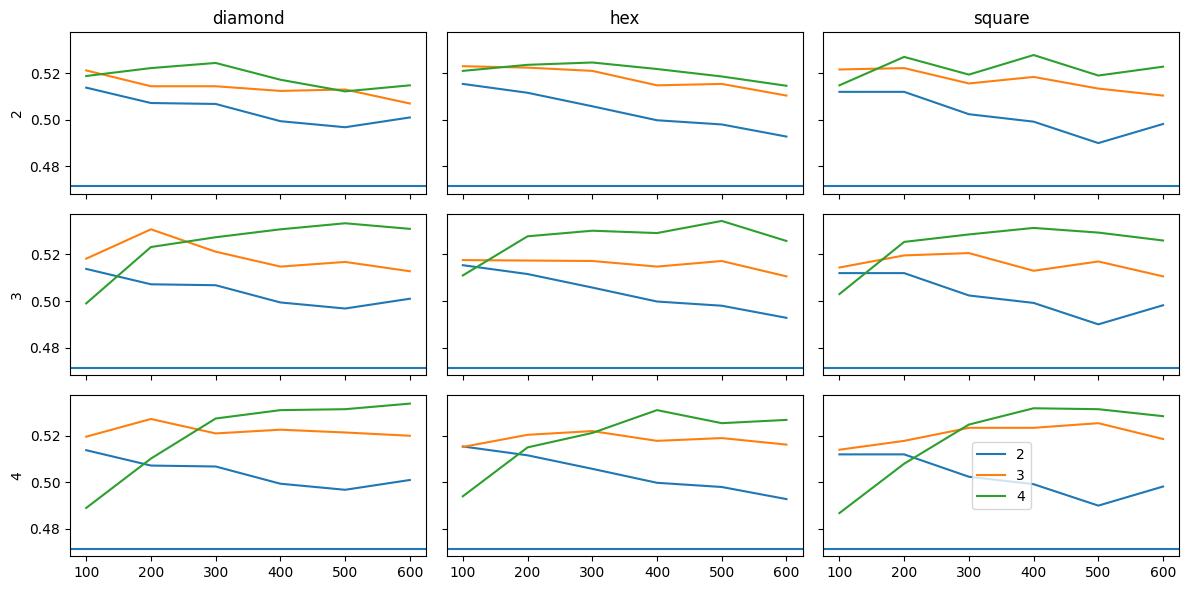

In [70]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 6), sharex=True, sharey=True)
df_model = df[df["model_cls"] == "TULHOR"]
df_base = df_model[df_model['loc_levels'] == 1]
df_plot = df_model[df_model["aggregation_mode"] == "grow"]
for col_idx, (shape, df_col) in enumerate(df_plot.groupby("discretization_shape")):
    axs[0, col_idx].set_title(shape)
    for row_idx, (grow_factor, df_row) in enumerate(df_col.groupby("grow_factor")):
        ax = axs[row_idx, col_idx]
        ax.axhline(y=df_base['top_1_accuracy'].item())
        for loc_levels in [2, 3, 4]:
            df_line = df_row[df_row['loc_levels'] == loc_levels]
            df_line = df_line.sort_values(by="discretization_rows")
            ax.plot(
                df_line["discretization_rows"],
                df_line["top_1_accuracy"],
                label=loc_levels,
            )
        if col_idx == 0:
            ax.set_ylabel(grow_factor)
leg = ax.legend()
fig.tight_layout()

In [68]:
dfg = df[df['aggregation_mode'] == 'grow']
max_idcs = dfg.groupby(["model_cls", "loc_levels"])['top_1_accuracy'].idxmax()
dfg.loc[max_idcs][hparams + metrics]

,model_cls,loc_levels,grow_factor,discretization_rows,discretization_shape,macro_precision,macro_recall,macro_f1,top_5_accuracy,top_1_accuracy
432,BiTULER,2,2,300,diamond,0.566072,0.531768,0.527382,0.7110,0.5926
405,BiTULER,3,3,500,hex,0.575818,0.544885,0.541526,0.7178,0.5994
412,BiTULER,4,2,500,hex,0.578438,0.542850,0.539818,0.7218,0.5998
90,TULHOR,2,2,100,hex,0.485508,0.468588,0.461927,0.6498,0.5154
157,TULHOR,3,3,200,diamond,0.500342,0.482941,0.475106,0.6656,0.5308
235,TULHOR,4,3,500,hex,0.507449,0.486602,0.480628,0.6658,0.5344


In [69]:
dft = df[df['aggregation_mode'] == 'group']
max_idcs = dft.groupby(["model_cls", "loc_levels"])['top_1_accuracy'].idxmax()
dft.loc[max_idcs][hparams + metrics]

,model_cls,loc_levels,grow_factor,discretization_rows,discretization_shape,macro_precision,macro_recall,macro_f1,top_5_accuracy,top_1_accuracy
252,BiTULER,1,2,100,hex,0.556094,0.518056,0.511645,0.6856,0.5680
4,BiTULER,2,2,300,diamond,0.566072,0.531768,0.527382,0.7110,0.5926
336,BiTULER,3,2,500,hex,0.577141,0.539004,0.536168,0.7154,0.5980
338,BiTULER,4,2,500,hex,0.576041,0.537089,0.535559,0.7264,0.5938
528,TULHOR,1,2,100,hex,0.444090,0.427566,0.417359,0.5834,0.4714
36,TULHOR,2,2,100,hex,0.485508,0.468588,0.461927,0.6498,0.5154
58,TULHOR,3,2,200,diamond,0.491191,0.475495,0.468100,0.6642,0.5240
82,TULHOR,4,2,400,diamond,0.511932,0.487988,0.481858,0.6744,0.5354


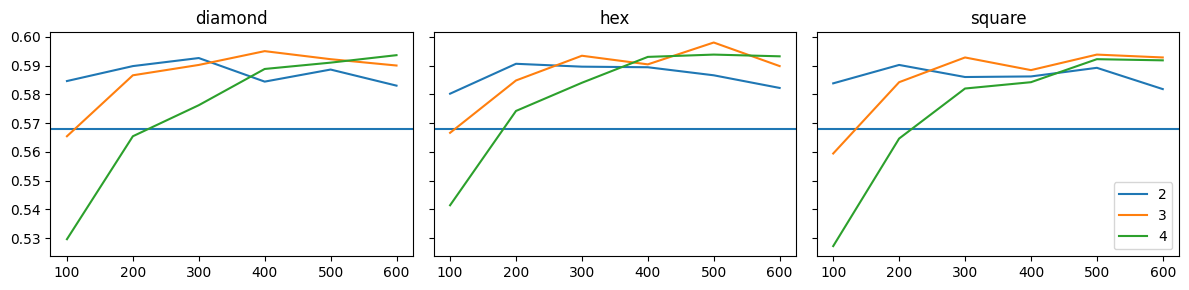

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3), sharex=True, sharey=True)
df_model = df[df["model_cls"] == "BiTULER"]
df_base = df_model[df_model['loc_levels'] == 1]
df_plot = df_model[df_model["aggregation_mode"] == "group"]
for col_idx, (shape, df_col) in enumerate(df_plot.groupby("discretization_shape")):
    axs[col_idx].set_title(shape)
    ax = axs[col_idx]
    ax.axhline(y=df_base['top_1_accuracy'].item())
    for loc_levels in [2, 3, 4]:
        df_line = df_col[df_col['loc_levels'] == loc_levels]
        df_line = df_line.sort_values(by="discretization_rows")
        ax.plot(
            df_line["discretization_rows"],
            df_line["top_1_accuracy"],
            label=loc_levels,
        )
leg = ax.legend()
fig.tight_layout()

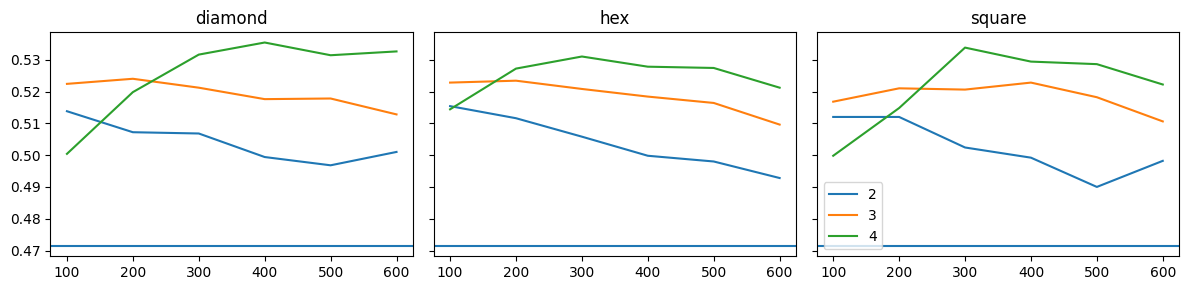

In [71]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3), sharex=True, sharey=True)
df_model = df[df["model_cls"] == "TULHOR"]
df_base = df_model[df_model['loc_levels'] == 1]
df_plot = df_model[df_model["aggregation_mode"] == "group"]
for col_idx, (shape, df_col) in enumerate(df_plot.groupby("discretization_shape")):
    axs[col_idx].set_title(shape)
    ax = axs[col_idx]
    ax.axhline(y=df_base['top_1_accuracy'].item())
    for loc_levels in [2, 3, 4]:
        df_line = df_col[df_col['loc_levels'] == loc_levels]
        df_line = df_line.sort_values(by="discretization_rows")
        ax.plot(
            df_line["discretization_rows"],
            df_line["top_1_accuracy"],
            label=loc_levels,
        )
leg = ax.legend()
fig.tight_layout()